**1. Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**2. Load and Preprocess the Dataset**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


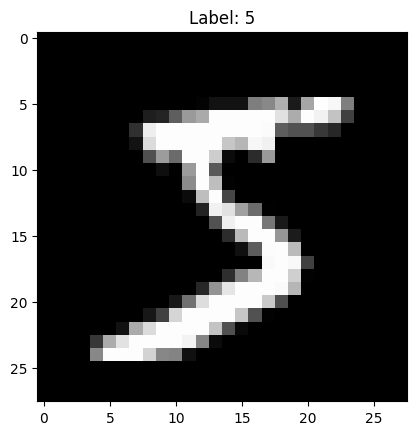

In [6]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values (0 to 1)
train_images = train_images / 255.0
test_images = test_images / 255.0
# Add a channel dimension (grayscale image has 1 channel)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
# Display a sample image
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


**3. Build the Model**

In [11]:
# Create CNN model
model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dropout(0.5), # Regularization
layers.Dense(10, activation='softmax') ])# 10 classes for digits 0-9
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**4. Train the Model**

In [12]:
# Train the model
history = model.fit(train_images, train_labels,
epochs=10,
validation_split=0.2, # Use 20% of training data for validation
batch_size=64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7789 - loss: 0.6906 - val_accuracy: 0.9770 - val_loss: 0.0817
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9542 - loss: 0.1557 - val_accuracy: 0.9851 - val_loss: 0.0540
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9675 - loss: 0.1111 - val_accuracy: 0.9866 - val_loss: 0.0483
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 87s 66ms/step - accuracy: 0.9742 - loss: 0.0885 - val_accuracy: 0.9863 - val_loss: 0.0480
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9764 - loss: 0.0775 - val_accuracy: 0.9898 - val_loss: 0.0393
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9796 - loss: 0.0617 - val_accuracy: 0.9895 - val_loss: 0.0409
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9813 - loss: 0.0631 - val_accuracy: 0.9900 - val_loss: 0.0397
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9826 - loss: 0.0521 - 

 **5. Evaluate the Model**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9893 - loss: 0.0354
Test Accuracy: 99.13%


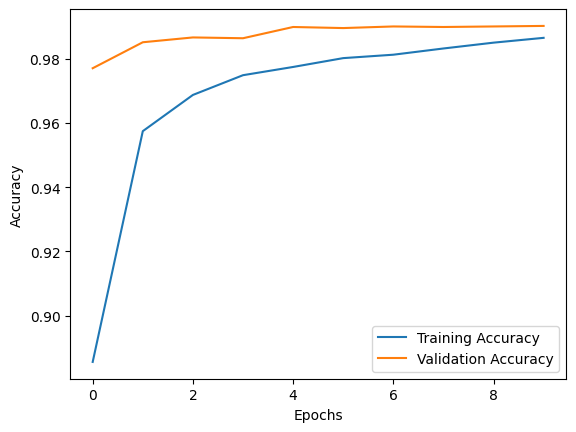

In [13]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**6. Save and Load the Model**

In [15]:
# Save the model
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")
# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

Model saved as mnist_cnn_model.h5


**7. Test Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


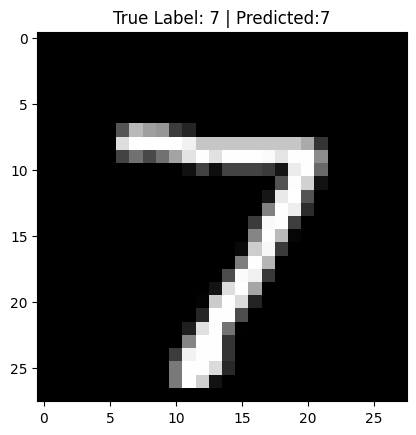

In [16]:
# Make predictions
import numpy as np
predictions = loaded_model.predict(test_images)
# Display a test image and predicted label
index = 0 # Change this to view other test images
plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {test_labels[index]} | Predicted:{np.argmax(predictions[index])}")
plt.show()
